# 用梯度上升法求全局最大值

梯度上升法（gradient ascent method）是一种迭代求全局最大值的方法，由于梯度上升法需要大量的计算，因此它非常适合程序化求解而不是手动求解。

In [1]:
import sympy as sp
import math

这里以找一个合适的角度Θ，使抛出的物体能飞的最远为例。  
若抛射速度为u，角度为Θ：  
飞行时间：t = 2 * usinθ/g  
水平飞行距离：R = ucosθ * t = u<sup>2</sup>sin2θ/g

梯度上升法是一种迭代方法：从θ的一个初始值开始，例如0.001或θ<sub>old</sub>=0.001，并逐渐接近对应于最大射程距离的θ值。  
逐步接近的方程如下：  
θ<sub>new</sub> = θ<sub>old</sub> + λdR/dθ
其中，λ表示步长，dR/dθ是R关于θ的导数。设定θ<sub>old</sub>=0.001后，按下述步骤进行：  
1. 使用之前的公式计算θ<sub>new</sub>
2. 若θ<sub>new</sub> - θ<sub>old</sub>的绝对值大于设定值ε，则定义θ<sub>old</sub> = θ<sub>new</sub>并返回步骤1，否则执行步骤3
3. θ<sub>new</sub>是R取最大值时对应的θ的近似值

这里的epsilon（ε）值的大小决定算法何时停止迭代，后面会继续讨论ε的设定。

In [2]:
def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size * f1x.subs({x:x_old}).evalf()
    while abs(x_new - x_old) > epsilon:
        x_old = x_new
        x_new = x_old + step_size * f1x.subs({x:x_old}).evalf()
    return x_new

In [3]:
def find_max_theta(R, theta):
    R1theta = sp.Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max = grad_ascent(theta0, R1theta, theta)
    return theta_max

In [4]:
if __name__ == '__main__':
    g = 9.8
    u = 25
    theta = sp.Symbol('theta')
    R = u**2*sp.sin(2*theta)/g
    theta_max = find_max_theta(R, theta)
    print('Theta: {0}'.format(math.degrees(theta_max)))
    print('Maximum Range: {0}'.format(R.subs({theta:theta_max})))

Theta: 44.997815081691805
Maximum Range: 63.7755100185965


理论值时45°角抛射，水平距离最远，看到结果还是很接近的。

## 梯度上升法的通用程序

In [5]:
def common_grad_ascent():
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sp.sympify(f)
    except sp.core.sympify.SympifyError:
        print('Invalid function entered')
    else:
        var = sp.Symbol(var)
        d = sp.Derivative(f, var).doit()
        var_max = grad_ascent(var0, d, var)
        print('{0}: {1}'.format(var.name, var_max))
        print('Maximum value: {0}'.format(f.subs({var:var_max})))

In [6]:
if __name__ == '__main__':
    common_grad_ascent()
    # 25*25*sin(2*theta)/9.8    theta    0.001

Enter a function in one variable:  25*25*sin(2*theta)/9.8
Enter the variable to differentiate with respect to:  theta
Enter the initial value of the variable:  0.001


theta: 0.785360029379083
Maximum value: 63.7755100185965


In [7]:
if __name__ == '__main__':
    common_grad_ascent()
    # cos(y)    y    0.01

Enter a function in one variable:  cos(y)
Enter the variable to differentiate with respect to:  y
Enter the initial value of the variable:  0.01


y: 0.00999900001666658
Maximum value: 0.999950010415832


In [8]:
if __name__ == '__main__':
    common_grad_ascent()
    # cos(y) + k    y    0.01

Enter a function in one variable:  cos(y) + k 
Enter the variable to differentiate with respect to:  y
Enter the initial value of the variable:  0.01


y: 0.00999900001666658
Maximum value: k + 0.999950010415832


## 关于初始值的附加说明

开始迭代梯度上升法时的变量初始值在算法中起着非常重要的作用。考虑之前使用过的函数x<sup>5</sup> - 30x<sup>3</sup> + 50x，这里我们使用上面的梯度上升法的通用程序来计算最大值：

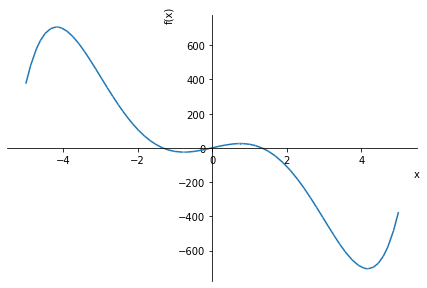

In [9]:
x = sp.Symbol('x')
f = x**5 - 30*x**3 + 50*x

sp.plotting.plot(f, (x, -5, 5))

In [10]:
if __name__ == '__main__':
    common_grad_ascent()
    # x**5 - 30*x**3 + 50*x    x    -2

Enter a function in one variable:  x**5 - 30*x**3 + 50*x
Enter the variable to differentiate with respect to:  x
Enter the initial value of the variable:  -2


x: -4.17445116397103
Maximum value: 705.959460322318


当找到最近的峰值时，梯度上升法就停止了，但最近的峰值并不总是全局的最大值。在这里例子中，如果你从初始值-2开始出发，程序停止时所在的峰值恰巧是定义域中的全局最大值。为了进一步验证，我们尝试一个不同的初始值：

In [11]:
if __name__ == '__main__':
    common_grad_ascent()
    # x**5 - 30*x**3 + 50*x    x    0.5

Enter a function in one variable:  x**5 - 30*x**3 + 50*x
Enter the variable to differentiate with respect to:  x
Enter the initial value of the variable:  0.5


x: 0.757452532565767
Maximum value: 25.0846622605419


因此，我们使用该方法时，必须仔细选择初始值。有些改进的算法也在试着解决这个问题。

## 步长和epsilon的角色

在梯度上升算法中，变量的下一个值的计算公式为θ<sub>new</sub> = θ<sub>old</sub> + λdR/dθ，其中λ表示步长。步长决定了下一步的距离，它应该被设置的很小，以避免越过峰值。换句话说，如果x的当前值接近于函数的最大值点，那么下一步不应该越过这个峰值，否则算法将失效。另外，非常小的步长值将花费更多的计算时间。之前我们使用了固定的步长10<sup>-3</sup>，但是这个值并不适用于所有的函数。  
epsilon的值（ε）决定何时停止算法的迭代，它应该是一个足够小的数，小到我们确信x的值不再变化。我们希望一阶导数f<sup>'</sup>(x)在最大值点处为0，并且在理想情况下|θ<sub>new</sub> - θ<sub>old</sub>| = 0（参见梯度上升算法中的第2步）。然而，由于数值计算的不精确性，我们并不能精确的得到差值0，因此应该选取一个接近于0的epsilon值，它从实际的角度告诉我们x的值不再改变。我们在之前所有的函数中将epsilon设定为10<sup>-6</sup>，这个值虽然足够小，也适用于那些f<sup>'</sup>(x) = 0有解的函数，例如sin(x)，但可能并不适用于其他函数。因此，最好在最后验证最大值，以保证其正确性，并在需要时相应地调整epsilon的值。  
梯度上升算法中的第2步也意味着，要让算法终止，方程式f<sup>'</sup>(x) = 0必须有一个解，而对于e<sup>x</sup>或log(x)这类函数则不是这样，如果你把这里函数输入到之前的程序中，程序将无法计算出解，程序将持续运行。针对这种情形，我们可以通过检查f<sup>'</sup>(x) = 0是否有解来改进梯度上升算法使其更有效。下面是改进的程序：

In [12]:
def grad_ascent(x0, f1x, x):
    # 检擦f1x=0是否有解
    if not sp.solve(f1x):
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size * f1x.subs({x:x_old}).evalf()
    while abs(x_new - x_old) > epsilon:
        x_old = x_new
        x_new = x_old + step_size * f1x.subs({x:x_old}).evalf()
    return x_new

In [13]:
def common_grad_ascent():
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sp.sympify(f)
    except sp.core.sympify.SympifyError:
        print('Invalid function entered')
    else:
        var = sp.Symbol(var)
        d = sp.Derivative(f, var).doit()
        var_max = grad_ascent(var0, d, var)
        if var_max:
            print('{0}: {1}'.format(var.name, var_max))
            print('Maximum value: {0}'.format(f.subs({var:var_max})))

In [14]:
if __name__ == '__main__':
    common_grad_ascent()
    # log(x)    x    0.1

Enter a function in one variable:  log(x)
Enter the variable to differentiate with respect to:  x
Enter the initial value of the variable:  0.1


Cannot continue, solution for 1/x=0 does not exist
